# Assignment 3: Probabilistic PCA

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

Probabilistic Principal Component Analysis or pPCA for short makes the following assumptions. 
We have observable variables $x \in \mathbb R^d$ and latent variables $z \in \mathbb R^m$. 
We model $z \sim \mathcal N(0, I)$ and $x \mid z \sim \mathcal N(W z + b, \sigma^2 I)$, where $\sigma^2 \in \mathbb R_+$ and $I$ is the identity matrix of appropriate size. 

## Exercise 1: Moment Generating Function

The moment generating function (MGF) of a random vector $\xi \in \mathbb R^m$ is defined as 
\begin{align*}
    M_{\xi}(t) = \mathbb E[\exp(t^\top \xi)],
\end{align*}
where $t \in \mathbb R^m$. 
Show that the MGF of $W \xi + b$ is
\begin{align*}
    M_{W \xi + b}(t) &= \exp(t^\top b) M_{\xi}(W^\top t). 
\end{align*}

########## YOUR SOLUTION HERE ##########

The MGF of a random vector $Y = W\xi + b$ is given by:
$$
M_Y(t) = \mathbb{E}[\exp(t^\top Y)]
$$
where $t \in \mathbb{R}^d$.

Substituting $Y = W\xi + b$ into the MGF definition:
$$
M_Y(t) = \mathbb{E}[\exp(t^\top (W\xi + b))]
$$

Using properties of exponentials, separate the terms involving $W\xi$ and $b$:
$$
M_Y(t) = \mathbb{E}[\exp(t^\top W\xi + t^\top b)]
$$

$$
M_Y(t) = \exp(t^\top b) \mathbb{E}[\exp(t^\top W\xi)]
$$
Since $t^\top b$ is a scalar, it can be taken outside the expectation.

Since $t^\top W$ can be interpreted as a new vector, say $u^\top$, where $u = W^\top t$. Then:
$$
M_Y(t) = \exp(t^\top b) \mathbb{E}[\exp(u^\top \xi)]
$$

$$
M_Y(t) = \exp(t^\top b) M_\xi(W^\top t)
$$
Here, $M_\xi(u)$ is the MGF of $\xi$ evaluated at $u$, where $u = W^\top t$.

Thus, it can be proof that:
$$
M_{W\xi + b}(t) = \exp(t^\top b) M_\xi(W^\top t)
$$

## Exercise 2: Linear Combination of Gaussians

If $\xi$ is normally distributed with mean $\mu$ and covariance matrix $\Sigma$, then its MGF is given by
\begin{align*}
    M_{\xi}(t) = \exp(t^\top(\mu + \frac12 \Sigma t)). 
\end{align*}
Use this fact and the result from the previous exercise to show that the marginal $x \sim \mathcal N(b, WW^\top + \sigma^2 I)$. 

*Hint: argue that $x$ can be written as $Wz + b + \varepsilon$, where $z \sim \mathcal N(0, I)$ and $\varepsilon \sim \mathcal N(0, \sigma^2 I)$.*

########## YOUR SOLUTION HERE ##########

##### Premisse

1. **Latent Variables Distribution**:
   - $z \sim \mathcal{N}(0, I)$, meaning $\xi = z$ here has MGF $M_z(t) = \exp(\frac{1}{2} t^\top t)$ since $\mu = 0$ and $\Sigma = I$ for $z$.

2. **Noise Distribution**:
   - $\varepsilon \sim \mathcal{N}(0, \sigma^2 I)$, so the MGF for $\varepsilon$ is $M_\varepsilon(t) = \exp(\frac{1}{2} \sigma^2 t^\top t)$.

##### Exercise
Using the previous exercise:
$$
M_{Wz}(t) = \exp(t^\top 0) M_z(W^\top t) = M_z(W^\top t)
$$
Now, substituting into the MGF for $z$:
$$
M_{Wz}(t) = \exp\left(\frac{1}{2} (W^\top t)^\top (W^\top t)\right) = \exp\left(\frac{1}{2} t^\top WW^\top t\right)
$$
Therefore $Wz$ is normally distributed (with mean 0 and covariance $WW^\top$).

Since $Wz$ and $\varepsilon$ are independent, the MGF of their sum $Wz + \varepsilon$ is the product of their MGFs:
$$
M_{Wz + \varepsilon}(t) = M_{Wz}(t) M_{\varepsilon}(t)
$$

$$
M_{Wz + \varepsilon}(t) = \exp\left(\frac{1}{2} t^\top WW^\top t\right) \exp\left(\frac{1}{2} \sigma^2 t^\top t\right)
$$
$$
M_{Wz + \varepsilon}(t) = \exp\left(\frac{1}{2} t^\top (WW^\top + \sigma^2 I) t\right)
$$

Considering the case for $x = Wz + b + \varepsilon$
$$
M_x(t) = \exp(t^\top b) M_{Wz + \varepsilon}(t)
$$

$$
M_x(t) = \exp(t^\top b) \exp\left(\frac{1}{2} t^\top (WW^\top + \sigma^2 I) t\right)
$$

$$
M_x(t) = \exp\left(t^\top b + \frac{1}{2} t^\top (WW^\top + \sigma^2 I) t\right)
$$

This MGF corresponds to a normal distribution with mean $b$ and covariance $WW^\top + \sigma^2 I$. Therefore:

$$
x \sim \mathcal{N}(b, WW^\top + \sigma^2 I)
$$

## Exercise 3: Maximum Likelihood for $b$

Now that we have a closed form for the marginal $p(x) = \mathcal N(b, WW^\top + \sigma^2 I)$ we can formulate the log-likelihood function as 
\begin{align*}
    \log \mathcal L(\{x_i\} \mid b, W, \sigma^2) &= \sum_{i=1}^n \log p(x_i) \\
    &= -\frac{nd}{2} \log(2 \pi) - \frac{n}{2} \log|C| - \frac12 \sum_{i=1}^n (x_i - b)^\top C^{-1} (x - b),
\end{align*}
where $C = WW^\top + \sigma^2 I$. 
We would like to maximize it with respect to the parameters $b, W, \sigma^2$. 
Prove that the arithmetic mean $b^{\ast} = \bar x = \frac1n \sum_{i=1}^n x_i$ maximizes the log-likelihood. 

########## YOUR SOLUTION HERE ##########

The relevant term in the log-likelihood function that depends on $b$ is:
$$
\log \mathcal{L}(\{x_i\} \mid b, W, \sigma^2) = -\frac{1}{2} \sum_{i=1}^n (x_i - b)^\top C^{-1} (x_i - b)
$$
where $C = WW^\top + \sigma^2 I$ and $C^{-1}$ is the inverse of $C$.

For simplification, denoting $y_i = x_i - b$ and the sum of squared differences as:
$$
\sum_{i=1}^n (x_i - b)^\top C^{-1} (x_i - b)
$$
Since $C^{-1}$ is symmetric, the expression simplifies to:
$$
\sum_{i=1}^n y_i^\top C^{-1} y_i
$$

To find the value of $b$ that maximizes the log-likelihood, derivative is set to zero. The calculation of the derivative is:
$$
\frac{\partial}{\partial b} \left[ \sum_{i=1}^n (x_i - b)^\top C^{-1} (x_i - b) \right] = -2 \sum_{i=1}^n C^{-1} (x_i - b)
$$

Set this derivative to zero:
$$
\sum_{i=1}^n C^{-1} (x_i - b) = 0
$$

$$
C^{-1} \sum_{i=1}^n (x_i - b) = 0
$$

Since $C^{-1}$ is invertible (it's the inverse of a positive definite matrix $C$), we can multiply through by $C$:
$$
\sum_{i=1}^n (x_i - b) = 0
$$

Solving for $b$
$$
n b = \sum_{i=1}^n x_i
$$
$$
b = \frac{1}{n} \sum_{i=1}^n x_i = \bar{x}
$$

## Exercise 4: Maximum Likelihood for $W$

Substituting the result from the previous exercise back into the log-likelihood function lets us rewrite it as
\begin{align*}
    \log \mathcal L(\{x_i\} \mid b, W, \sigma^2) &= -\frac{n}{2} \left(d \log(2 \pi) + \log|C| + \operatorname{Tr}(C^{-1} S) \right),
\end{align*}
where
\begin{align*}
    S = \frac1n \sum_{i=1}^n (x_i - \bar x) (x_i - \bar x)^\top 
\end{align*}
is the sample covariance matrix. 
The derivative of the log-likelihood function w.r.t. $W$ is given by
\begin{align*}
    \frac{\partial \log \mathcal L}{\partial W} &= n(C^{-1} S C^{-1} W - C^{-1} W). 
\end{align*}
Setting it to zero leads to the condition
\begin{align*}
    SC^{-1}W = W.
\end{align*}
Assuming $W \neq 0$ and $S \neq C$, show that
\begin{align*}
    SU = U(\sigma^2 I + D^2)
\end{align*}
is a sufficient condition, where $U D V^\top$ is the singular value decomposition of $W$ with $U \in \mathbb R^{d \times m}$ and $D, V \in \mathbb R^{m \times m}$ and $D$ diagonal. 
Argue why the columns of $U$ must be eigenvectors of $S$. 
What are their eigenvalues? Conclude that the solution may be written as
\begin{align*}
    W = U (\Lambda - \sigma^2I)^{\frac12} V^\top,
\end{align*}
where $\Lambda$ is a $m \times m$ diagonal matrix holding $m$ eigenvalues of $S$. Assume that all $d$ eigenvalues of $S$ are positive. 
What is the role of $V$?

########## YOUR SOLUTION HERE ##########

Given:
$$
\frac{\partial \log \mathcal L}{\partial W} = n(C^{-1} S C^{-1} W - C^{-1} W) = 0
$$
leads to the matrix equation:
$$
SC^{-1}W = W
$$

Where:
- $S$ is the sample covariance matrix,
- $C = WW^\top + \sigma^2 I$ is the covariance matrix of the observed data under the model.

Assuming $W$ can be decomposed into $W = UDV^\top$, where:
- $U$ is a matrix of left singular vectors (orthonormal),
- $D$ is a diagonal matrix containing singular values,
- $V$ is a matrix of right singular vectors (orthonormal).

From the given:
$$
C = WW^\top + \sigma^2 I = UDV^\top VD^\top U^\top + \sigma^2 I = UD^2U^\top + \sigma^2 I
$$

Since $V^\top V = I$ for orthogonal $V$. Thus, $C^{-1}$ assuming the eigen-decomposition of $UD^2U^\top$:
$$
C^{-1} = (UD^2U^\top + \sigma^2 I)^{-1} = U(\sigma^2 I + D^2)^{-1}U^\top
$$

Using $C^{-1}W$ from above:
$$
SC^{-1}W = S U(\sigma^2 I + D^2)^{-1}U^\top UDV^\top = SU(\sigma^2 I + D^2)^{-1}DV^\top
$$

Setting this equal to $W$ and simplifying:
$$
SU(\sigma^2 I + D^2)^{-1}D = UDV^\top
$$

The above suggests that multiplying $U$ by $S$ should result in scaling each column of $U$ by the diagonal elements of $(\sigma^2 I + D^2)$. Thus:
$$
SU = U(\sigma^2 I + D^2)
$$

Where the columns of $U$ are eigenvectors of $S$, and the eigenvalues associated with these eigenvectors are given by $\sigma^2 + d_i^2$ where $d_i$ are the diagonal entries of $D$.

Thus, the optimal $W$ can be re-expressed taking into account these eigenvectors and eigenvalues:
$$
W = U (\Lambda - \sigma^2 I)^{\frac{1}{2}} V^\top
$$

Where:
- $\Lambda$ diagonal matrix of eigenvalues $ \lambda_i = \sigma^2 + d_i^2 $,
- $U$ columns are the eigenvectors of $S$,
- $V$ aligns the latent space to match the structure in $S$. It is essential because it provides the basis transformation for $D$ such that the variance explained by the model is maximized or well-represented in the lower-dimensional space.


## Exercise 5: Likelihood Function

In the following, let $Y$ be the "full" $d \times d$ eigenbasis of $S$ (in contrast the "reduced" $d \times m$ matrix $U$). 
Show that when we substitute our solution for $W = U (\Lambda - \sigma^2I)^{\frac12}$ into $C$, we get
\begin{align*}
    C &= Y K Y^\top,
\end{align*}
where $K$ is an $d \times d$ diagonal matrix with 
\begin{align*}
    k_i = 
    \begin{cases}
    \lambda_i \quad \text{ if } i \leq m \\
    \sigma^2 \quad \text{ else.}
    \end{cases}
\end{align*}
Use this result to show that the log-likelihood function can be written as
\begin{align*}
    \log \mathcal L(\{x_i\} \mid b, W, \sigma^2) &= -\frac{n}{2} \left(d \log(2 \pi) + \sum_{i=1}^m \log \lambda_i + (d-m) \log \sigma^2 + m + \frac{1}{\sigma^2} \sum_{j=m+1}^d \lambda_j \right). 
\end{align*}

########## YOUR SOLUTION HERE ##########

Given the matrix $W = U(\Lambda - \sigma^2 I)^{\frac{1}{2}}$, where $U$ is a $d \times m$ matrix containing the first $m$ eigenvectors of $S$ corresponding to the $m$ largest eigenvalues:

$$
W W^\top = U(\Lambda - \sigma^2 I)^{\frac{1}{2}}(\Lambda - \sigma^2 I)^{\frac{1}{2}} U^\top = U(\Lambda - \sigma^2 I) U^\top
$$

The covariance matrix $C$ then becomes:
$$
C = W W^\top + \sigma^2 I = U(\Lambda - \sigma^2 I)U^\top + \sigma^2 I
$$

Since $U$ consists of the first $m$ eigenvectors of $S$, extend this to the full eigenbasis $Y$ of $S$, which is a $d \times d$ orthogonal matrix. The remaining $d-m$ columns correspond to the other eigenvectors, with eigenvalues that do not significantly contribute to the dimensionality reduction, essentially adding $\sigma^2$ to those dimensions.

Considering the structure of $C$ in the full basis:
$$
Y = [U | U_\perp]
$$
$$
Y^\top = \begin{bmatrix} U^\top \\ U_\perp^\top \end{bmatrix}
$$

We can express:
$$
C = (U(\Lambda - \sigma^2 I)U^\top + \sigma^2 I) = Y \begin{bmatrix} \Lambda & 0 \\ 0 & \sigma^2 I \end{bmatrix} Y^\top
$$

Where the diagonal matrix within $Y \ldots Y^\top$ structure is $K$ with:
$$
k_i = 
\begin{cases}
    \lambda_i & \text{if } i \leq m \\
    \sigma^2 & \text{else}
\end{cases}
$$

Given:
$$
C = YKY^\top
$$

The determinant and inverse of $C$ can be expressed through $K$ due to its diagonal nature:
$$
\log|C| = \log|K| = \sum_{i=1}^d \log k_i
$$
$$
C^{-1} = YK^{-1}Y^\top
$$

The trace term in the likelihood:
$$
\operatorname{Tr}(C^{-1}S) = \operatorname{Tr}(YK^{-1}Y^\top S) = \operatorname{Tr}(K^{-1}Y^\top SY)
$$

Given $Y^\top SY = \Lambda$ (because $Y$ is the eigenbasis of $S$):
$$
\operatorname{Tr}(C^{-1}S) = \operatorname{Tr}(K^{-1}\Lambda)
$$

### Step 5: Final Log-Likelihood Expression

Log-likelihood becomes:
$$
\log \mathcal L(\{x_i\} \mid b, W, \sigma^2) = -\frac{n}{2} \left(d \log(2 \pi) + \sum_{i=1}^m \log \lambda_i + (d-m) \log \sigma^2 + m + \frac{1}{\sigma^2} \sum_{j=m+1}^d \lambda_j \right)
$$

This expression accounts for:
- The $m$ significant eigenvalues $\lambda_i$ contributing directly.
- The $d-m$ less significant eigenvalues contributing through the $\sigma^2$ term.
- $m$ and $\frac{1}{\sigma^2} \sum_{j=m+1}^d \lambda_j$ relate to the variance explained by each dimension and the residual variance, respectively.

## Exercise 6: Maximum Likelihood for $\sigma^2$

Use the likelihood function derived in the previous exercise to conclude that the maximum likelihood estimator for $\sigma^2$ is
\begin{align*}
    \sigma^2 &= \frac{1}{d-m} \sum_{j=m+1}^d \lambda_j .
\end{align*}

########## YOUR SOLUTION HERE ##########

From previous exercise:
$$
\log \mathcal{L}(\{x_i\} \mid b, W, \sigma^2) = -\frac{n}{2} \left(d \log(2 \pi) + \sum_{i=1}^m \log \lambda_i + (d-m) \log \sigma^2 + m + \frac{1}{\sigma^2} \sum_{j=m+1}^d \lambda_j \right)
$$

Focusing on $\sigma^2$, we see it appears in:
- $(d-m) \log \sigma^2$
- $\frac{1}{\sigma^2} \sum_{j=m+1}^d \lambda_j$

To maximize this function with respect to $\sigma^2$, differentiate the relevant terms and set the derivative to zero:
$$
\frac{\partial}{\partial \sigma^2} \left( -(d-m) \log \sigma^2 - \frac{1}{\sigma^2} \sum_{j=m+1}^d \lambda_j \right) = 0
$$

$$
-(d-m) \frac{1}{\sigma^2} + \frac{1}{(\sigma^2)^2} \sum_{j=m+1}^d \lambda_j = 0
$$

Multiply through by $(\sigma^2)^2$ to simplify:
$$
-(d-m) \sigma^2 + \sum_{j=m+1}^d \lambda_j = 0
$$

Solving for $\sigma^2$, we get:
$$
\sigma^2 = \frac{\sum_{j=m+1}^d \lambda_j}{d-m}
$$

## Exercise 7: Generate Toy Data

Probabilistic PCA is a generative model, i.e., it comes with a description of the data generation process. 
In this exercise, let $d=10, m=3$, and $\sigma^2 = 1/2$. 
Draw model parameters $W, b$ from a standard normal distribution and generate a dataset $X$ according to the pPCA generative model. 

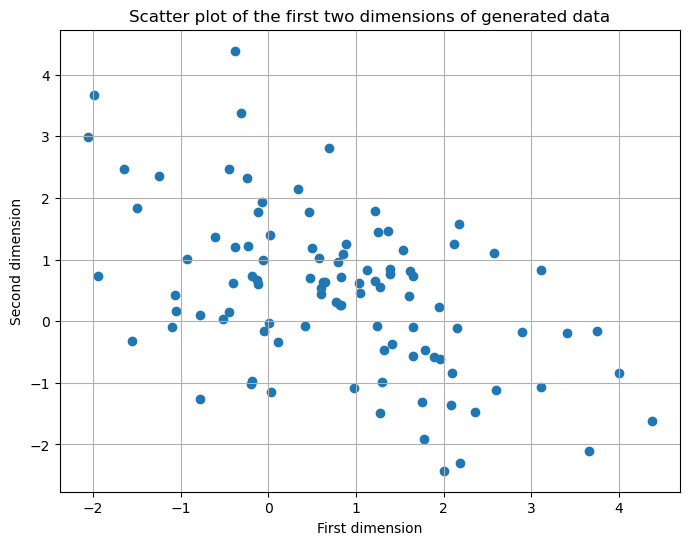

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

########## YOUR SOLUTION HERE ##########

d = 10  # Dimension of observed data
m = 3   # Dimension of latent variables
sigma_squared = 0.5  # Variance of the noise
n = 100  # Number of samples

# Generate model parameters
W = np.random.normal(0, 1, (d, m))
b = np.random.normal(0, 1, (d,))

# Generate latent variables
z = np.random.normal(0, 1, (n, m))

# Generate noise
epsilon = np.random.normal(0, np.sqrt(sigma_squared), (n, d))

# Generate observed data
X = np.dot(z, W.T) + b + epsilon

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scatter plot of the first two dimensions of generated data')
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.grid(True)
plt.show()

## Exercise 8: Parameter Estimation by Maximum Likelihood 

Take the data matrix from the previous exercise and fit the parameters $b, \sigma^2, W$ according to their maximum likelihood estimates. Interpret your results. 

In [2]:
########## YOUR SOLUTION HERE ##########

import numpy as np

# Number of components
m = 3
n, d = X.shape

# Center the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute the sample covariance matrix
S = np.dot(X_centered.T, X_centered) / n

# Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(S)
# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Estimate W and sigma^2
sigma_squared_MLE = np.mean(eigenvalues[m:])
W_MLE = eigenvectors[:, :m] * np.sqrt(eigenvalues[:m] - sigma_squared_MLE)

# Estimate b
b_MLE = X_mean

print("Estimated b (mean vector):", b_MLE)
print("\nEstimated W (loading matrix):", W_MLE)
print("\nEstimated sigma^2 (noise variance):", sigma_squared_MLE)

Estimated b (mean vector):
[ 0.80339437  0.44037337  0.40309565 -1.09994508 -0.71428725 -3.13780064
  0.88299364  1.48966298  0.25027268 -0.26021722]

Estimated W (loading matrix):
[[-1.10538592  0.0454017   0.45618556]
 [ 0.9308792  -0.45691902  0.37297161]
 [-1.55449376 -1.87532785 -0.01014751]
 [ 0.96054107  0.10322216  0.06168364]
 [ 1.93490477 -0.91386903  0.53638419]
 [ 0.47265552  0.68508433  0.42029491]
 [ 1.05377477  0.42504181  0.12629589]
 [-1.59550109 -0.09533615  0.17382083]
 [ 1.84618314  0.11823462 -0.39968855]
 [ 1.24375254 -1.53781485 -0.21894966]]

Estimated sigma^2 (noise variance):
0.448113255304643


The estimated b values are `[ 0.80339437, 0.44037337, 0.40309565, -1.09994508, -0.71428725, -3.13780064, 0.88299364, 1.48966298, 0.25027268, -0.26021722]`.
The estimated noise variance is `0.448113255304643`, very close to the true variance used in the generation process ($\sigma^2 = 0.5$).
The accuracy of $b$ and $\sigma^2$ estimates indicate that the model assumptions (linear relationship and Gaussian noise) are well suited for the data generated.